In [ ]:
# Convert results dictionary to a DataFrame
results_list = []
for (class1, class2, clf_name), report in results.items():
    for metric_type, metrics in report.items():
        if isinstance(metrics, dict):
            for metric_name, value in metrics.items():
                results_list.append({
                    'Class1': class1,
                    'Class2': class2,
                    'Classifier': clf_name,
                    'MetricType': metric_type,
                    'MetricName': metric_name,
                    'Value': value
                })
        else:
            results_list.append({
                'Class1': class1,
                'Class2': class2,
                'Classifier': clf_name,
                'MetricType': metric_type,
                'MetricName': 'overall',
                'Value': metrics
            })

results_df = pd.DataFrame(results_list)
print("Results DataFrame:")
print(results_df.head())

# Convert feature importances dictionary to a DataFrame
feature_importances_list = []
for (class1, class2, clf_name), importances in feature_importances.items():
    for feature_name, importance in zip(selected_features_df.columns, importances):
        feature_importances_list.append({
            'Class1': class1,
            'Class2': class2,
            'Classifier': clf_name,
            'FeatureName': feature_name,
            'Importance': importance
        })

feature_importances_df = pd.DataFrame(feature_importances_list)
print("Feature Importances DataFrame:")
print(feature_importances_df.head())

# Convert roc_coords dictionary to a DataFrame
roc_list = []
for (class1, class2, clf_name), roc_data in roc_coords.items():
    for fpr, tpr in zip(roc_data['fpr'], roc_data['tpr']):
        roc_list.append({
            'Class1': class1,
            'Class2': class2,
            'Classifier': clf_name,
            'FPR': fpr,
            'TPR': tpr,
            'AUC': roc_data['auc']
        })

roc_df = pd.DataFrame(roc_list)
print("ROC Coordinates DataFrame:")
print(roc_df.head())


Results DataFrame:
  Class1 Class2 Classifier MetricType MetricName       Value
0    CCK    GFP        SVM        CCK  precision    0.214452
1    CCK    GFP        SVM        CCK     recall    0.657415
2    CCK    GFP        SVM        CCK   f1-score    0.323311
3    CCK    GFP        SVM        CCK    support  222.400000
4    CCK    GFP        SVM        GFP  precision    0.958743
Feature Importances DataFrame:
  Class1 Class2 Classifier             FeatureName  Importance
0    CCK    GFP        SVM               Area_post    0.013381
1    CCK    GFP        SVM               Skew_post    0.003397
2    CCK    GFP        SVM  normMeanIntensity_post    0.029857
3    CCK    GFP        SVM                Area_pre    0.003317
4    CCK    GFP        SVM                Skew_pre   -0.003230
ROC Coordinates DataFrame:
  Class1 Class2 Classifier       FPR       TPR       AUC
0    CCK    GFP        SVM  0.000000  0.000000  0.778436
1    CCK    GFP        SVM  0.000000  0.000087  0.778436
2    CCK

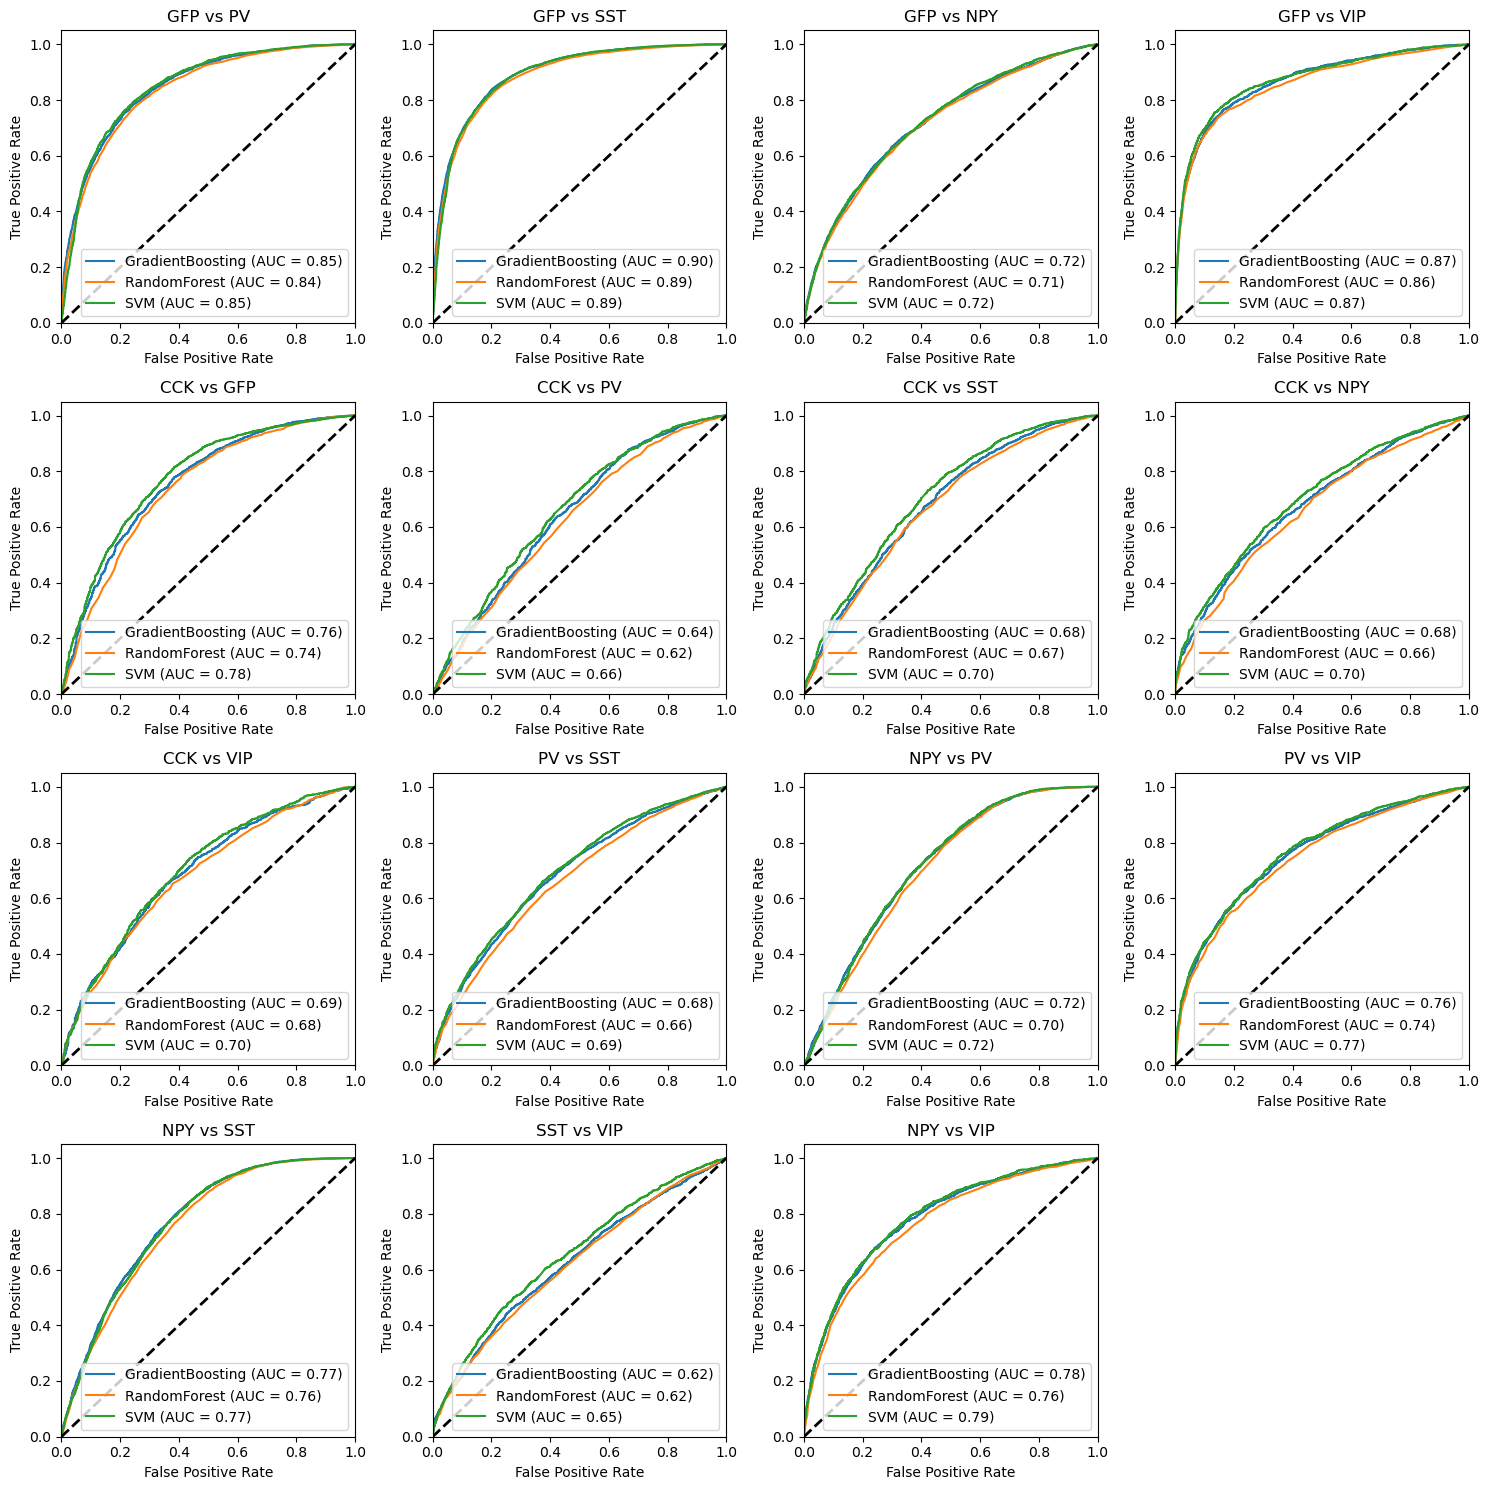

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the custom order for plotting
custom_order = [
    ('GFP', 'PV'),
    ('GFP', 'SST'),
    ('GFP', 'NPY'),
    ('GFP', 'VIP'),
    ('CCK', 'GFP'),
    ('CCK', 'PV'),
    ('CCK', 'SST'),
    ('CCK', 'NPY'),
    ('CCK', 'VIP'),
    ('PV', 'SST'),
    ('PV', 'NPY'),
    ('PV', 'VIP'),
    ('SST', 'NPY'),
    ('SST', 'VIP'),
    ('NPY', 'VIP')
]

# Create an ordered DataFrame based on custom_order
ordered_roc_df = pd.concat([
    roc_df[(roc_df['Class1'] == class1) & (roc_df['Class2'] == class2) |
           (roc_df['Class1'] == class2) & (roc_df['Class2'] == class1)]
    for class1, class2 in custom_order
])

# Get unique class pairs based on the custom order
class_pairs = ordered_roc_df[['Class1', 'Class2']].drop_duplicates()

# Determine the number of subplots needed
num_plots = len(class_pairs)
ncols = int(np.ceil(np.sqrt(num_plots)))
nrows = int(np.ceil(num_plots / ncols))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
axes = axes.flatten()  # Flatten to easily iterate

for idx, (class1, class2) in enumerate(class_pairs.values):
    group_df = ordered_roc_df[(ordered_roc_df['Class1'] == class1) & (ordered_roc_df['Class2'] == class2)]
    ax = axes[idx]

    for clf_name, clf_df in group_df.groupby('Classifier'):
        ax.plot(clf_df['FPR'], clf_df['TPR'], label=f'{clf_name} (AUC = {clf_df["AUC"].iloc[0]:.2f})')

    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'{class1} vs {class2}')
    ax.legend(loc='lower right')

# Hide unused subplots
for idx in range(len(class_pairs), len(axes)):
    axes[idx].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


/var/folders/zx/dd5pwj7j77186v_cv8qc_rdr0000gn/T/ipykernel_7982/3974217238.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/diyasharma/anaconda3/envs/umap-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/diyasharma/anaconda3/envs/umap-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/diyasharma/anaconda3/envs/umap-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 li

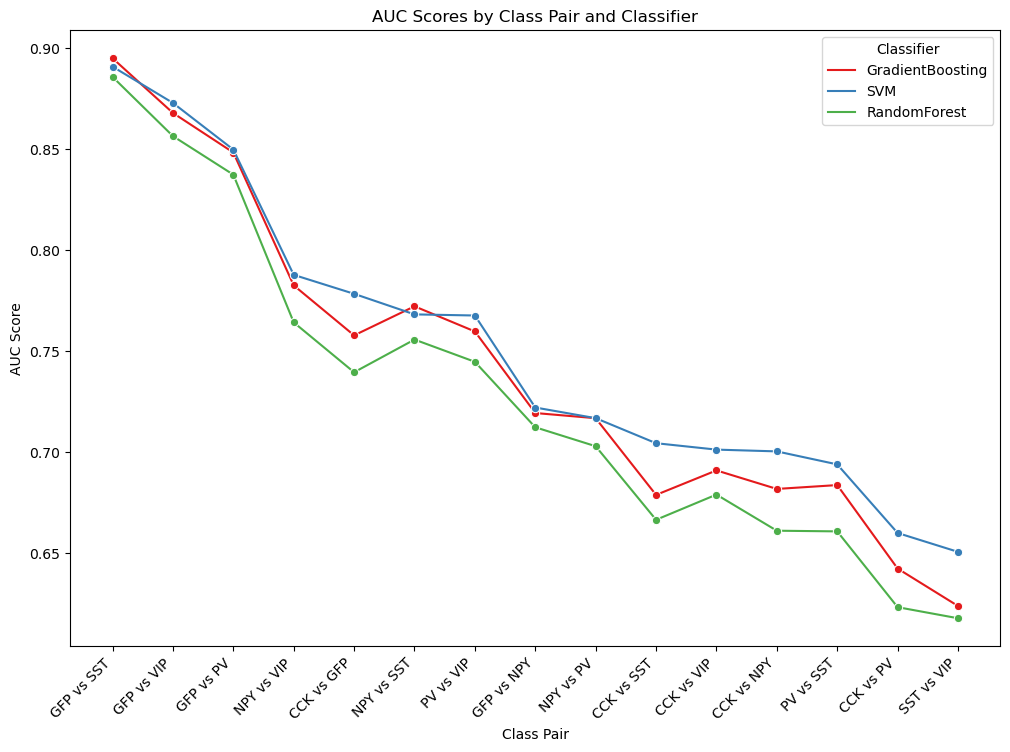

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate AUC scores by class pair and classifier
auc_df = roc_df.drop_duplicates(subset=['Class1', 'Class2', 'Classifier', 'AUC'])

# Create a new column for the class pair
auc_df['ClassPair'] = auc_df['Class1'] + ' vs ' + auc_df['Class2']

# Sort the DataFrame by AUC values in descending order
auc_df_sorted = auc_df.sort_values(by='AUC', ascending=False)

# Plot AUC scores
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=auc_df_sorted,
    x='ClassPair',
    y='AUC',
    hue='Classifier',
    marker='o',
    palette='Set1',
    errorbar=None
)
plt.title('AUC Scores by Class Pair and Classifier')
plt.xlabel('Class Pair')
plt.ylabel('AUC Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Classifier')
plt.show()


#### Weighted Feature Importances

In [ ]:
# Initialize a dictionary to store the weighted feature importances
weighted_feature_importances = {}

# Iterate over the class pairs and classifiers
for (class1, class2, clf_name), importances in feature_importances.items():
    # Get the accuracy from the results dictionary
    accuracy = results[(class1, class2, clf_name)]['accuracy']

    # Calculate weighted feature importances
    weighted_importance = importances * accuracy

    # Store the weighted importances
    weighted_feature_importances[(class1, class2, clf_name)] = weighted_importance


In [ ]:
# Convert weighted feature importances to a DataFrame
weighted_feature_importances_list = []
for (class1, class2, clf_name), weighted_importances in weighted_feature_importances.items():
    for feature_name, weighted_importance in zip(selected_features_df.columns, weighted_importances):
        weighted_feature_importances_list.append({
            'Class1': class1,
            'Class2': class2,
            'Classifier': clf_name,
            'FeatureName': feature_name,
            'WeightedImportance': weighted_importance
        })

weighted_feature_importances_df = pd.DataFrame(weighted_feature_importances_list)
print("Weighted Feature Importances DataFrame:")
print(weighted_feature_importances_df.head())


Weighted Feature Importances DataFrame:
  Class1 Class2 Classifier             FeatureName  WeightedImportance
0    CCK    GFP        SVM               Area_post            0.010142
1    CCK    GFP        SVM               Skew_post            0.002575
2    CCK    GFP        SVM  normMeanIntensity_post            0.022631
3    CCK    GFP        SVM                Area_pre            0.002515
4    CCK    GFP        SVM                Skew_pre           -0.002449


In [ ]:
# Aggregate weighted feature importances by averaging across all class pairs
aggregated_weighted_importances_df = weighted_feature_importances_df.groupby(
    ['Classifier', 'FeatureName']
)['WeightedImportance'].mean().reset_index()

print("Aggregated Weighted Feature Importances:")
print(aggregated_weighted_importances_df.head())


Aggregated Weighted Feature Importances:
         Classifier             FeatureName  WeightedImportance
0  GradientBoosting               Area_post            0.004351
1  GradientBoosting                Area_pre            0.006726
2  GradientBoosting               Skew_post            0.001832
3  GradientBoosting                Skew_pre            0.002918
4  GradientBoosting  normMeanIntensity_post            0.043060


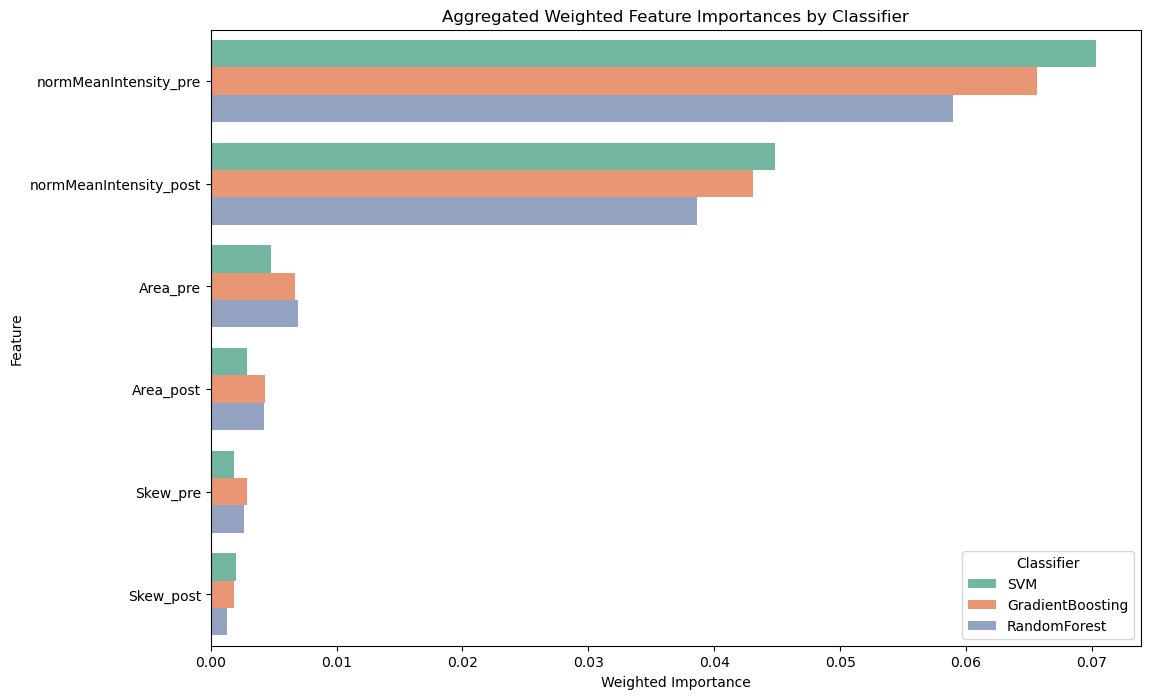

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by 'WeightedImportance' in descending order
aggregated_weighted_importances_df_sorted = aggregated_weighted_importances_df.sort_values(
    by='WeightedImportance', ascending=False
)

# Plot aggregated weighted feature importances
plt.figure(figsize=(12, 8))
sns.barplot(
    data=aggregated_weighted_importances_df_sorted,
    x='WeightedImportance',
    y='FeatureName',
    hue='Classifier',
    errorbar=None,
    palette='Set2'
)
plt.title('Aggregated Weighted Feature Importances by Classifier')
plt.xlabel('Weighted Importance')
plt.ylabel('Feature')
plt.legend(title='Classifier')
plt.show()


#### Heatmap of Mean Weighted Feature per Pair

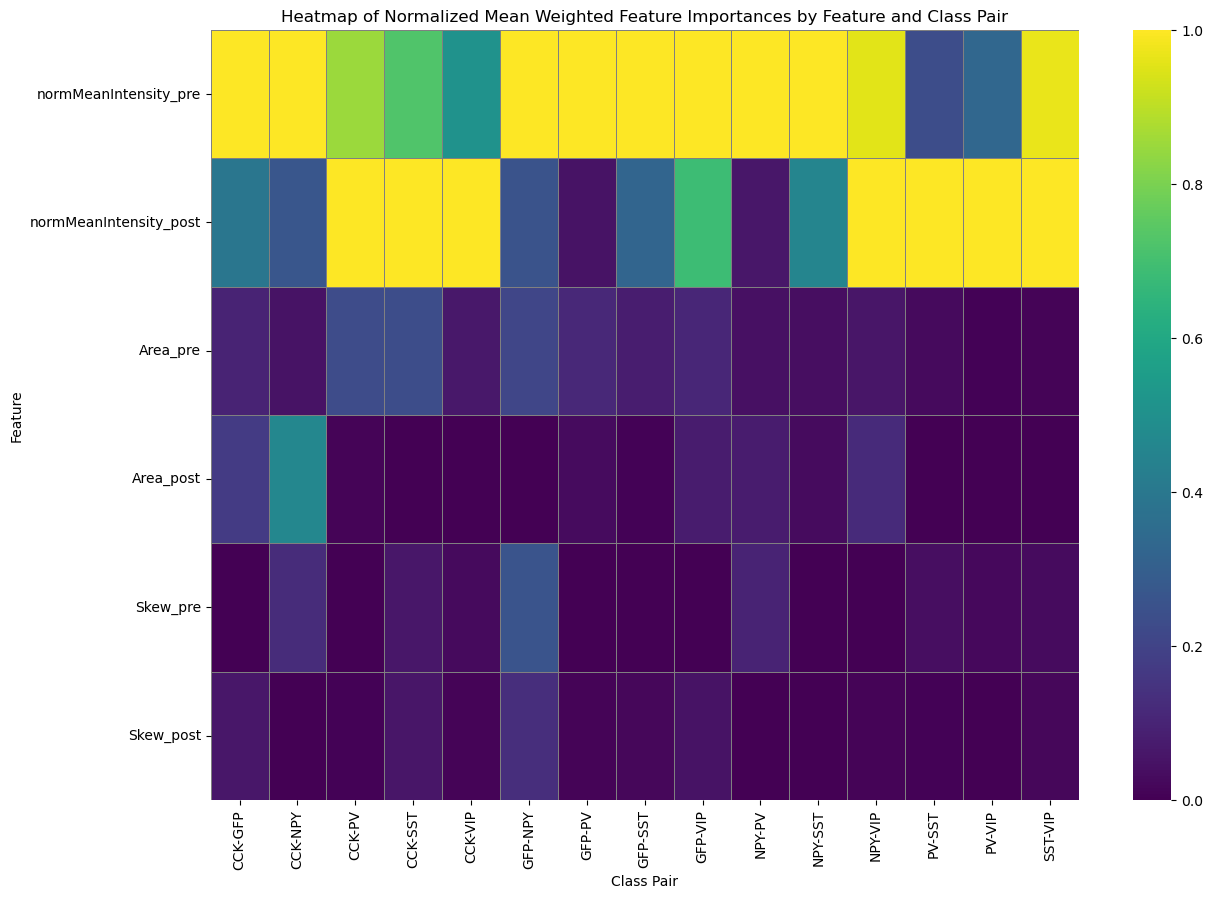

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming weighted_feature_importances_df has columns: 'Class1', 'Class2', 'Classifier', 'FeatureName', 'WeightedImportance'

# Calculate the mean weighted importance for each feature across classifiers
mean_weighted_importances = weighted_feature_importances_df.groupby(
    ['Class1', 'Class2', 'FeatureName']
)['WeightedImportance'].mean().reset_index()

# Pivot the DataFrame to create a matrix for heatmap
heatmap_data = mean_weighted_importances.pivot_table(
    index='FeatureName',
    columns=['Class1', 'Class2'],
    values='WeightedImportance'
)

# Normalize the data to the range [0, 1]
heatmap_data_normalized = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

# Sort features by the mean importance across class pairs in descending order
mean_importance_by_feature = heatmap_data_normalized.mean(axis=1)
sorted_features = mean_importance_by_feature.sort_values(ascending=False).index
heatmap_data_sorted = heatmap_data_normalized.loc[sorted_features]

# Plot heatmap of normalized feature importances
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data_sorted,
    cmap='viridis',
    annot=False,
    linewidths=.5,
    linecolor='gray'
)
plt.title('Heatmap of Normalized Mean Weighted Feature Importances by Feature and Class Pair')
plt.xlabel('Class Pair')
plt.ylabel('Feature')
plt.show()


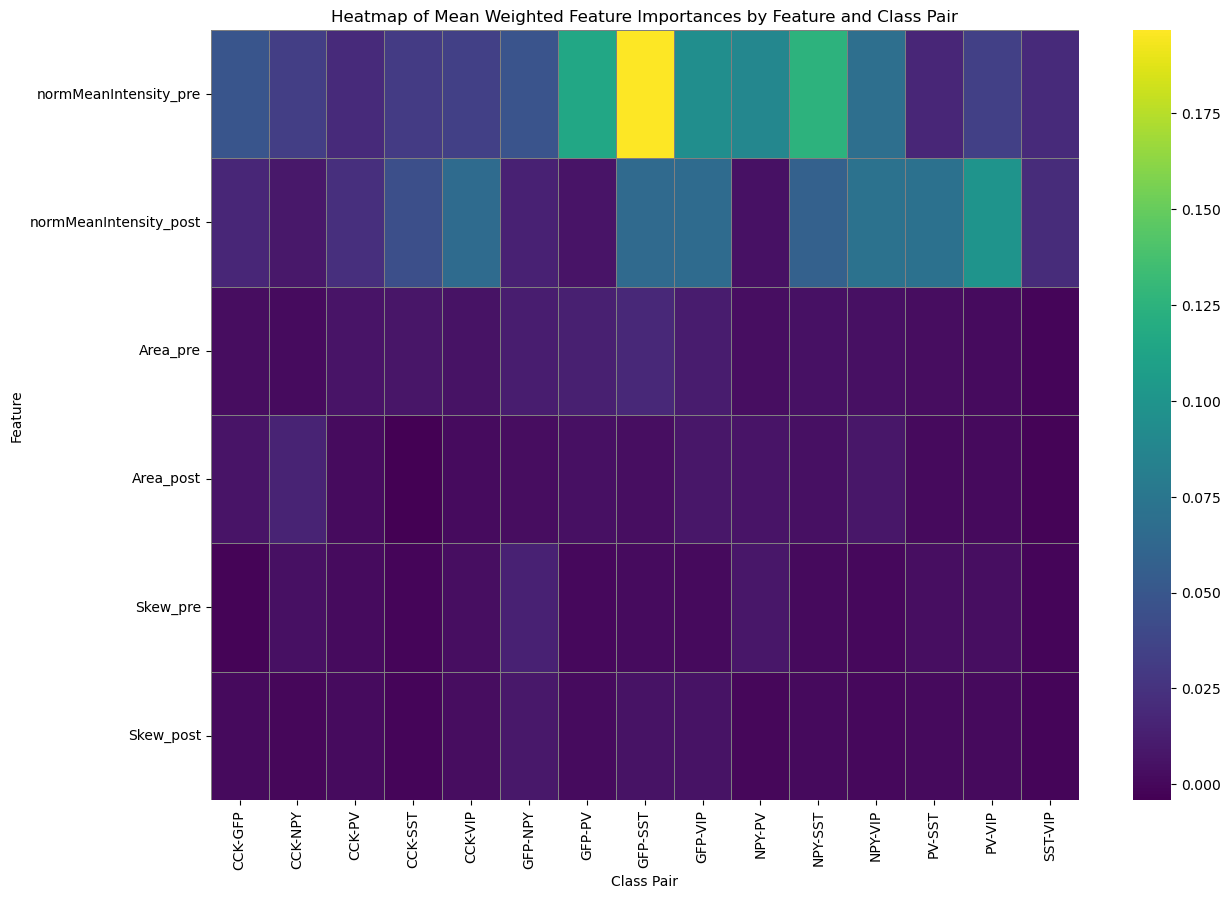

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming weighted_feature_importances_df has columns: 'Class1', 'Class2', 'Classifier', 'FeatureName', 'WeightedImportance'

# Calculate the mean weighted importance for each feature across classifiers
mean_weighted_importances = weighted_feature_importances_df.groupby(
    ['Class1', 'Class2', 'FeatureName']
)['WeightedImportance'].mean().reset_index()

# Pivot the DataFrame to create a matrix for heatmap
heatmap_data = mean_weighted_importances.pivot_table(
    index='FeatureName',
    columns=['Class1', 'Class2'],
    values='WeightedImportance'
)

# Sort features by the mean importance across class pairs in descending order
mean_importance_by_feature = heatmap_data.mean(axis=1)
sorted_features = mean_importance_by_feature.sort_values(ascending=False).index
heatmap_data_sorted = heatmap_data.loc[sorted_features]

# Plot heatmap of normalized feature importances
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data_sorted,
    cmap='viridis',
    annot=False,
    linewidths=.5,
    linecolor='gray'
)
plt.title('Heatmap of Mean Weighted Feature Importances by Feature and Class Pair')
plt.xlabel('Class Pair')
plt.ylabel('Feature')
plt.show()
